In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\'


data= pd.read_excel(loc + 'Final_data_predictHQ_temp.xlsx', index_col=False)
data.head()

,Date,Country,State,Region,District,Location,Major Department,Department,Category,Group,...,Amount,Conferences_Impact,Expose_Impact,Concerts_Impact,Festivals_Impacts,Performing_Arts_Impact,Community_Impact,Sports_Impact,Total_Impact_Active,Temperature (°F)
0,2022-11-14,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,...,898.59,88,0,145,0,0,0,407,640,48.6
1,2022-11-14,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,...,790.93,88,0,145,0,0,0,407,640,48.6
2,2022-11-14,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,...,583.46,88,0,145,0,0,0,407,640,48.6
3,2022-11-07,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,...,1134.68,0,0,180,220,0,0,0,400,53.7
4,2022-11-07,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,...,763.31,0,0,180,220,0,0,0,400,53.7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    352 non-null    datetime64[ns]
 1   Country                 352 non-null    object        
 2   State                   352 non-null    object        
 3   Region                  352 non-null    object        
 4   District                352 non-null    object        
 5   Location                352 non-null    object        
 6   Major Department        352 non-null    object        
 7   Department              352 non-null    object        
 8   Category                352 non-null    object        
 9   Group                   352 non-null    object        
 10  Item Category           352 non-null    object        
 11  Item                    352 non-null    object        
 12  Quantity                352 non-null    float64   

In [4]:
import copy
data_df= copy.deepcopy(data)

In [5]:
data_df= data_df[['Date', 'Location', 'Item', 'Quantity', 'Amount', 'Conferences_Impact', 'Expose_Impact', 'Concerts_Impact',\
     'Festivals_Impacts', 'Performing_Arts_Impact', 'Community_Impact', 'Sports_Impact', 'Temperature (°F)']]

In [6]:
data_df

,Date,Location,Item,Quantity,Amount,Conferences_Impact,Expose_Impact,Concerts_Impact,Festivals_Impacts,Performing_Arts_Impact,Community_Impact,Sports_Impact,Temperature (°F)
0,2022-11-14,RICHMOND CA,DRUMSTICKS NNNN,696.58142,898.59,88,0,145,0,0,0,407,48.6
1,2022-11-14,RICHMOND CA,CHICKEN XXXXX - O,132.04172,790.93,88,0,145,0,0,0,407,48.6
2,2022-11-14,RICHMOND CA,FILLET QQQQ,64.90101,583.46,88,0,145,0,0,0,407,48.6
3,2022-11-07,RICHMOND CA,DRUMSTICKS NNNN,879.59692,1134.68,0,0,180,220,0,0,0,53.7
4,2022-11-07,RICHMOND CA,CHICKEN XXXXX - O,127.43071,763.31,0,0,180,220,0,0,0,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2022-11-27,IRVINE,DRUMSTICKS NNNN,105.65117,136.29,0,0,1628,489,3608,0,0,59.9
348,2022-11-27,IRVINE,CHICKEN XXXXX - O,37.54925,224.92,0,0,1628,489,3608,0,0,59.9
349,2022-11-27,LAKEWOOD,DRUMSTICKS NNNN,201.62792,260.10,0,0,240,0,494,0,0,55.3
350,2022-11-27,LAKEWOOD,CHICKEN XXXXX - O,84.08014,503.64,0,0,240,0,494,0,0,55.3


In [7]:
from matplotlib import pyplot

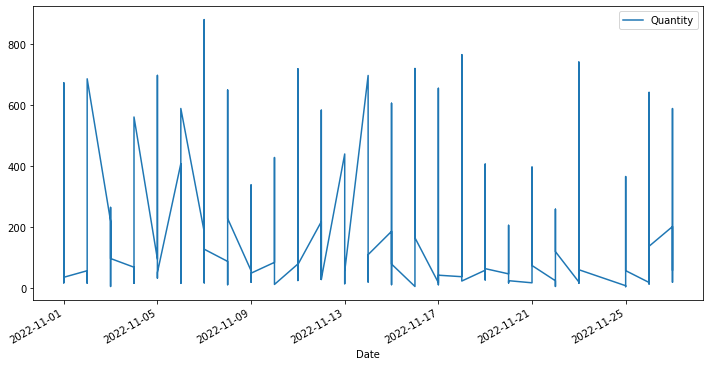

In [8]:
#data_df['Date'] = pd.to_datetime(data_df['Date']) # convert date column to DateTime
ax = data_df.plot(x='Date', y='Quantity', figsize=(12,6))

In [9]:
train_dates = pd.to_datetime(data_df['Date'])

In [10]:
train_dates.min(), train_dates.max(),

(Timestamp('2022-11-01 00:00:00'), Timestamp('2022-11-27 00:00:00'))

In [11]:
data_df['Location'].unique()

array(['RICHMOND CA', 'MOUNTAIN VIEW', 'BURBANK', 'IRVINE', 'LAKEWOOD'],
      dtype=object)

In [12]:
data_df['Item'].unique()

array(['DRUMSTICKS NNNN', 'CHICKEN XXXXX - O', 'FILLET QQQQ'],
      dtype=object)

In [13]:
# data_df1 = pd.get_dummies(data_df[['Location', 'Item']])
# df = pd.concat([data_df, data_df1], axis=1).reindex(data_df.index)


In [14]:
# df

In [15]:
# df.drop(['Location'], axis=1, inplace=True)

In [16]:
# data_df= data_df[(data_df['Location']== 'RICHMOND CA') & (data_df['Item']== 'DRUMSTICKS NNNN')]

In [17]:
# data_df.shape

In [18]:
# #converting categorical into numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label1 = le.fit_transform(data_df['Location'])
label2 = le.fit_transform(data_df['Item'])

In [19]:
data_df.drop("Location", axis=1, inplace=True)
data_df.drop("Item", axis=1, inplace=True)

In [20]:
data_df["Location"] = label1
data_df["Item"] = label2

In [21]:
data_df

,Date,Quantity,Amount,Conferences_Impact,Expose_Impact,Concerts_Impact,Festivals_Impacts,Performing_Arts_Impact,Community_Impact,Sports_Impact,Temperature (°F),Location,Item
0,2022-11-14,696.58142,898.59,88,0,145,0,0,0,407,48.6,4,1
1,2022-11-14,132.04172,790.93,88,0,145,0,0,0,407,48.6,4,0
2,2022-11-14,64.90101,583.46,88,0,145,0,0,0,407,48.6,4,2
3,2022-11-07,879.59692,1134.68,0,0,180,220,0,0,0,53.7,4,1
4,2022-11-07,127.43071,763.31,0,0,180,220,0,0,0,53.7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2022-11-27,105.65117,136.29,0,0,1628,489,3608,0,0,59.9,1,1
348,2022-11-27,37.54925,224.92,0,0,1628,489,3608,0,0,59.9,1,0
349,2022-11-27,201.62792,260.10,0,0,240,0,494,0,0,55.3,2,1
350,2022-11-27,84.08014,503.64,0,0,240,0,494,0,0,55.3,2,0


In [98]:
data_df1 = data_df[(data_df['Location']== 4) & (data_df['Item']== 2)]

In [99]:
# data_df

In [100]:
data_df1.shape

(26, 13)

In [101]:
data_df1.columns

Index(['Date', 'Quantity', 'Amount', 'Conferences_Impact', 'Expose_Impact',
       'Concerts_Impact', 'Festivals_Impacts', 'Performing_Arts_Impact',
       'Community_Impact', 'Sports_Impact', 'Temperature (°F)', 'Location',
       'Item'],
      dtype='object')

In [102]:
data_df2= data_df1.reindex(columns= ['Date', 'Location', 'Item', 'Amount', 'Conferences_Impact',\
                          'Expose_Impact', 'Concerts_Impact', 'Festivals_Impacts',\
                          'Performing_Arts_Impact', 'Community_Impact', 'Sports_Impact',\
                          'Temperature (°F)', 'Quantity'])

In [103]:
data_df2= data_df2.drop(['Amount'], axis=1)     #droping 'Amount'

In [104]:
data_df2

,Date,Location,Item,Conferences_Impact,Expose_Impact,Concerts_Impact,Festivals_Impacts,Performing_Arts_Impact,Community_Impact,Sports_Impact,Temperature (°F),Quantity
2,2022-11-14,4,2,88,0,145,0,0,0,407,48.6,64.90101
5,2022-11-07,4,2,0,0,180,220,0,0,0,53.7,101.71969
30,2022-11-15,4,2,0,0,0,0,0,0,0,52.1,62.04228
33,2022-11-01,4,2,0,0,0,0,843,0,0,55.8,72.63071
37,2022-11-08,4,2,0,0,0,0,0,0,0,49.9,65.98888
70,2022-11-16,4,2,0,0,0,0,0,0,0,51.1,71.84873
76,2022-11-02,4,2,0,0,0,0,0,0,0,54.0,56.98110
79,2022-11-09,4,2,0,0,0,0,0,0,0,51.6,102.41046
111,2022-11-17,4,2,0,0,264,0,0,0,0,49.7,38.81869
117,2022-11-03,4,2,0,0,488,0,0,0,0,50.6,96.95998


In [105]:
data_df2['Quantity'] = data_df2['Quantity'].round(decimals = 2)

In [106]:
cols = list(data_df2)[1:11]

In [107]:
print(cols)

['Location', 'Item', 'Conferences_Impact', 'Expose_Impact', 'Concerts_Impact', 'Festivals_Impacts', 'Performing_Arts_Impact', 'Community_Impact', 'Sports_Impact', 'Temperature (°F)']


In [108]:
len(cols)

10

In [109]:
#New dataframe with only training data - 11 columns
df_for_training = data_df2[cols].astype(float)

In [110]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(25,20))
# df_for_plot=df_for_training
# df_for_plot.plot.line()

In [111]:
df_for_training

,Location,Item,Conferences_Impact,Expose_Impact,Concerts_Impact,Festivals_Impacts,Performing_Arts_Impact,Community_Impact,Sports_Impact,Temperature (°F)
2,4.0,2.0,88.0,0.0,145.0,0.0,0.0,0.0,407.0,48.6
5,4.0,2.0,0.0,0.0,180.0,220.0,0.0,0.0,0.0,53.7
30,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.1
33,4.0,2.0,0.0,0.0,0.0,0.0,843.0,0.0,0.0,55.8
37,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.9
70,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.1
76,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
79,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.6
111,4.0,2.0,0.0,0.0,264.0,0.0,0.0,0.0,0.0,49.7
117,4.0,2.0,0.0,0.0,488.0,0.0,0.0,0.0,0.0,50.6


In [112]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)



In [113]:
# df_for_training_scaled

In [114]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 11. We will make timesteps = 10 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.




In [115]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (342, 5)
#342 refers to the number of data points and 11 refers to the columns (multi-variables).

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    

In [116]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [117]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (21, 5, 10).
trainY shape == (21, 1).


In [118]:
# define the LSTM model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 64)             19200     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [119]:
# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
2/2 [==============================] - 2s 308ms/step - loss: 0.0013 - val_loss: 3.4675e-05
Epoch 2/10
2/2 [==============================] - 0s 28ms/step - loss: 4.7420e-04 - val_loss: 6.3736e-06
Epoch 3/10
2/2 [==============================] - 0s 33ms/step - loss: 2.7532e-04 - val_loss: 3.5674e-05
Epoch 4/10
2/2 [==============================] - 0s 24ms/step - loss: 2.1659e-04 - val_loss: 1.0076e-04
Epoch 5/10
2/2 [==============================] - 0s 32ms/step - loss: 3.4627e-04 - val_loss: 1.1193e-04
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: 5.8229e-04 - val_loss: 3.2303e-05
Epoch 7/10
2/2 [==============================] - 0s 32ms/step - loss: 3.5350e-04 - val_loss: 2.0999e-05
Epoch 8/10
2/2 [==============================] - 0s 24ms/step - loss: 1.2613e-04 - val_loss: 1.0471e-04
Epoch 9/10
2/2 [==============================] - 0s 32ms/step - loss: 1.9918e-04 - val_loss: 2.2255e-04
Epoch 10/10
2/2 [==============================] - 0s 40ms

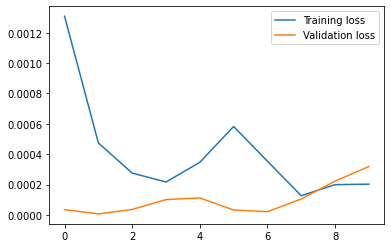

In [120]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [121]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [122]:
n_past = 6
n_days_for_prediction = 15  #let us predict past 12 days

In [123]:
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-11-28 00:00:00', freq='C'), Timestamp('2022-11-29 00:00:00', freq='C'), Timestamp('2022-11-30 00:00:00', freq='C'), Timestamp('2022-12-01 00:00:00', freq='C'), Timestamp('2022-12-02 00:00:00', freq='C'), Timestamp('2022-12-05 00:00:00', freq='C'), Timestamp('2022-12-06 00:00:00', freq='C'), Timestamp('2022-12-07 00:00:00', freq='C'), Timestamp('2022-12-08 00:00:00', freq='C'), Timestamp('2022-12-09 00:00:00', freq='C'), Timestamp('2022-12-12 00:00:00', freq='C'), Timestamp('2022-12-13 00:00:00', freq='C'), Timestamp('2022-12-14 00:00:00', freq='C'), Timestamp('2022-12-15 00:00:00', freq='C'), Timestamp('2022-12-16 00:00:00', freq='C')]


In [124]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

1/1 [==============================] - 0s 214ms/step


In [125]:
prediction

array([[ 0.00633332],
       [ 0.00260612],
       [ 0.0010617 ],
       [ 0.00081051],
       [ 0.00220559],
       [-0.003708  ],
       [-0.00806684],
       [-0.00411441],
       [ 0.00533278],
       [ 0.01816246],
       [ 0.03230431],
       [ 0.02957528],
       [ 0.0274426 ],
       [ 0.01058515],
       [ 0.00956003]], dtype=float32)

In [126]:
prediction.shape

(15, 1)

In [ ]:
from sklearn.metrics import mean_absolute_error


In [127]:
#Perform inverse transformation to rescale back to original range
#Since we used 11 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 11 times and discard them after inverse transform

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [128]:
y_pred_future

array([4.0063334, 4.002606 , 4.001062 , 4.0008106, 4.0022054, 3.996292 ,
       3.991933 , 3.9958856, 4.005333 , 4.0181623, 4.0323043, 4.0295753,
       4.0274425, 4.0105853, 4.00956  ], dtype=float32)

In [129]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Quantity':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [130]:
df_forecast

,Date,Quantity
0,2022-11-28,4.006333
1,2022-11-29,4.002606
2,2022-11-30,4.001062
3,2022-12-01,4.000811
4,2022-12-02,4.002205
5,2022-12-05,3.996292
6,2022-12-06,3.991933
7,2022-12-07,3.995886
8,2022-12-08,4.005333
9,2022-12-09,4.018162


In [131]:
df_forecast['Location']= 4
df_forecast['Item']= 2

In [132]:
df_forecast

,Date,Quantity,Location,Item
0,2022-11-28,4.006333,4,2
1,2022-11-29,4.002606,4,2
2,2022-11-30,4.001062,4,2
3,2022-12-01,4.000811,4,2
4,2022-12-02,4.002205,4,2
5,2022-12-05,3.996292,4,2
6,2022-12-06,3.991933,4,2
7,2022-12-07,3.995886,4,2
8,2022-12-08,4.005333,4,2
9,2022-12-09,4.018162,4,2


In [133]:
df_forecast.to_excel('Modelout\Loc4\Prediction_L4I2.xlsx', index= False)

In [58]:
#sudo pip install h5py

#model.save("my_model.h5")

In [59]:
# original = data_df[['Date', 'Quantity']]
# original['Date']=pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2022-11-01']

In [60]:
# original

In [61]:
# sns.lineplot(original['Date'], original['Quantity'])
# sns.lineplot(df_forecast['Date'], df_forecast['Quantity'])

### combining outputfile

In [135]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\ModelOut\\'


data_out1= pd.read_excel(loc + 'Loc0\Prediction_L0I0.xlsx', index_col=False)
data_out1.head()

,Date,Quantity,Location,Item
0,2022-11-28,-0.002088,0,0
1,2022-11-29,-0.001435,0,0
2,2022-11-30,-0.000211,0,0
3,2022-12-01,0.000968,0,0
4,2022-12-02,0.001127,0,0


In [137]:
data_out2 = pd.read_excel(loc + 'Loc0\Prediction_L0I1.xlsx', index_col=False)
data_out2.head()

,Date,Quantity,Location,Item
0,2022-11-28,0.005779,0,1
1,2022-11-29,0.005786,0,1
2,2022-11-30,0.001421,0,1
3,2022-12-01,0.002886,0,1
4,2022-12-02,0.000520,0,1


In [138]:
data_out3 = pd.read_excel(loc + 'Loc0\Prediction_L0I2.xlsx', index_col=False)

In [143]:
combined_data = pd.concat([data_out1, data_out2, data_out3], axis=0, ignore_index=True)

In [144]:
combined_data.shape

,Date,Quantity,Location,Item
0,2022-11-28,-0.002088,0,0
1,2022-11-29,-0.001435,0,0
2,2022-11-30,-0.000211,0,0
3,2022-12-01,0.000968,0,0
4,2022-12-02,0.001127,0,0
5,2022-12-05,0.001027,0,0
6,2022-12-06,-0.001009,0,0
7,2022-12-07,-0.001450,0,0
8,2022-12-08,-0.002271,0,0
9,2022-12-09,-0.002098,0,0


In [160]:
df_out1= pd.read_excel(loc + 'Loc1\Prediction_L1I0.xlsx', index_col=False)
df_out2= pd.read_excel(loc + 'Loc1\Prediction_L1I1.xlsx', index_col=False)

df_out3= pd.read_excel(loc + 'Loc2\Prediction_L2I0.xlsx', index_col=False)
df_out4= pd.read_excel(loc + 'Loc2\Prediction_L2I1.xlsx', index_col=False)
df_out5= pd.read_excel(loc + 'Loc2\Prediction_L2I2.xlsx', index_col=False)

df_out6= pd.read_excel(loc + 'Loc3\Prediction_L3I0.xlsx', index_col=False)
df_out7= pd.read_excel(loc + 'Loc3\Prediction_L3I1.xlsx', index_col=False)
df_out8= pd.read_excel(loc + 'Loc3\Prediction_L3I2.xlsx', index_col=False)

df_out9= pd.read_excel(loc + 'Loc4\Prediction_L4I0.xlsx', index_col=False)
df_out10= pd.read_excel(loc + 'Loc4\Prediction_L4I1.xlsx', index_col=False)
df_out11= pd.read_excel(loc + 'Loc4\Prediction_L4I2.xlsx', index_col=False)


In [161]:
combined_data1 = pd.concat([df_out1, df_out2, df_out3, df_out4,df_out5,df_out6,df_out7,df_out8,\
                           df_out9, df_out10,df_out11], axis=0, ignore_index=True)

In [162]:
combined_data1

,Date,Quantity,Location,Item
0,2022-11-28,1.006729,1,0
1,2022-11-29,1.009616,1,0
2,2022-11-30,1.000708,1,0
3,2022-12-01,1.001274,1,0
4,2022-12-02,0.996387,1,0
...,...,...,...,...
160,2022-12-12,4.032304,4,2
161,2022-12-13,4.029575,4,2
162,2022-12-14,4.027442,4,2
163,2022-12-15,4.010585,4,2


In [163]:
combined_data_final=  pd.concat([combined_data, combined_data1], axis=0, ignore_index=True)

In [164]:
combined_data_final

,Date,Quantity,Location,Item
0,2022-11-28,-0.002088,0,0
1,2022-11-29,-0.001435,0,0
2,2022-11-30,-0.000211,0,0
3,2022-12-01,0.000968,0,0
4,2022-12-02,0.001127,0,0
...,...,...,...,...
205,2022-12-12,4.032304,4,2
206,2022-12-13,4.029575,4,2
207,2022-12-14,4.027442,4,2
208,2022-12-15,4.010585,4,2


In [165]:
combined_data_final= combined_data_final.reindex(columns= ['Date', 'Location', 'Item', 'Quantity'])

In [166]:
combined_data_final= combined_data_final.rename(columns= {'Quantity':'Predicted_Qty'})

In [167]:
combined_data_final['Date']= combined_data_final['Date'].astype(str)

In [168]:
combined_data_final.sort_values(by='Date')

,Date,Location,Item,Predicted_Qty
0,2022-11-28,0,0,-0.002088
180,2022-11-28,4,1,3.999620
165,2022-11-28,4,0,4.000574
150,2022-11-28,3,2,2.991156
135,2022-11-28,3,1,2.989654
...,...,...,...,...
44,2022-12-16,0,2,-0.007374
29,2022-12-16,0,1,0.001953
14,2022-12-16,0,0,-0.002487
194,2022-12-16,4,1,4.006059


In [170]:
#combined_data_final.to_excel('Modelout\Prediction_15days.xlsx', index= False)